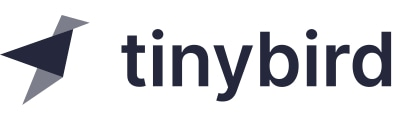
#Principles of Real-Time Analytics Course

`Copy to Drive` (see above) the Notebook.

In [1]:
#@title Mount your Google Drive to save and use local files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/Tinybird"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Tinybird


In [2]:
#@title Install Tinybird CLI and your token
!pip install tinybird-cli -q -U

import os

if not os.path.isdir('./datasources'):
  !tb init

if not os.path.isfile('.tinyb'): 
  !tb auth

     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 61 kB 8.7 MB/s 
     |████████████████████████████████| 81 kB 11.3 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 46 kB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
#@title Helper function
def write_text_to_file(filename, text):
  with open(filename, 'w') as f: f.write(text)

## Notebook Purpose

|Create           | 
| ----------------- |
|hits.datasource|


#ClickHouse Hits Dataset

https://clickhouse.tech/docs/en/getting-started/example-datasets/metrica/

Here we create a datasource of hits using the TSV creating by selecting columns from the ClickHouse table of hits.

`% ClickHouse/build/programs/clickhouse-client --query "SELECT EventTime, UserID, OS FROM tutorial.hits_v1" > datasources/fixtures/hits.tsv`

In [4]:
filename="datasources/hits.datasource"
text='''
SCHEMA >
    `EventTime` DateTime,
    `UserID` Int64,
    `OS` Int8
'''

write_text_to_file(filename, text)

In [5]:
!tb push datasources/hits.datasource

** Processing datasources/hits.datasource
** Building dependencies
** Running hits 
** 'hits' created
** Not pushing fixtures


In [6]:
!tb datasource append hits datasources/fixtures/hits.tsv

** 🥚 starting import process
** 🐥 done
** Total rows in hits: 8873897
** Data appended to Data Source 'hits' successfully!
** Data pushed to hits


In [7]:
!tb sql --stats "SELECT * FROM hits LIMIT 1"

** Query took 0.002397315 seconds
** Rows read: 1
** Bytes read: 13 bytes
--------------------------------------------------
| EventTime           |              UserID | OS |
--------------------------------------------------
| 2014-03-17 00:00:00 | 1778591838331565010 | 42 |
--------------------------------------------------


In [8]:
!tb sql --rows_limit 1 --stats "SELECT * FROM hits"

** Query took 0.003220148 seconds
** Rows read: 131,010
** Bytes read: 1.7 MB
--------------------------------------------------
| EventTime           |              UserID | OS |
--------------------------------------------------
| 2014-03-22 03:31:17 | 1385045190600802921 | 56 |
--------------------------------------------------


In the Tinybird UI:

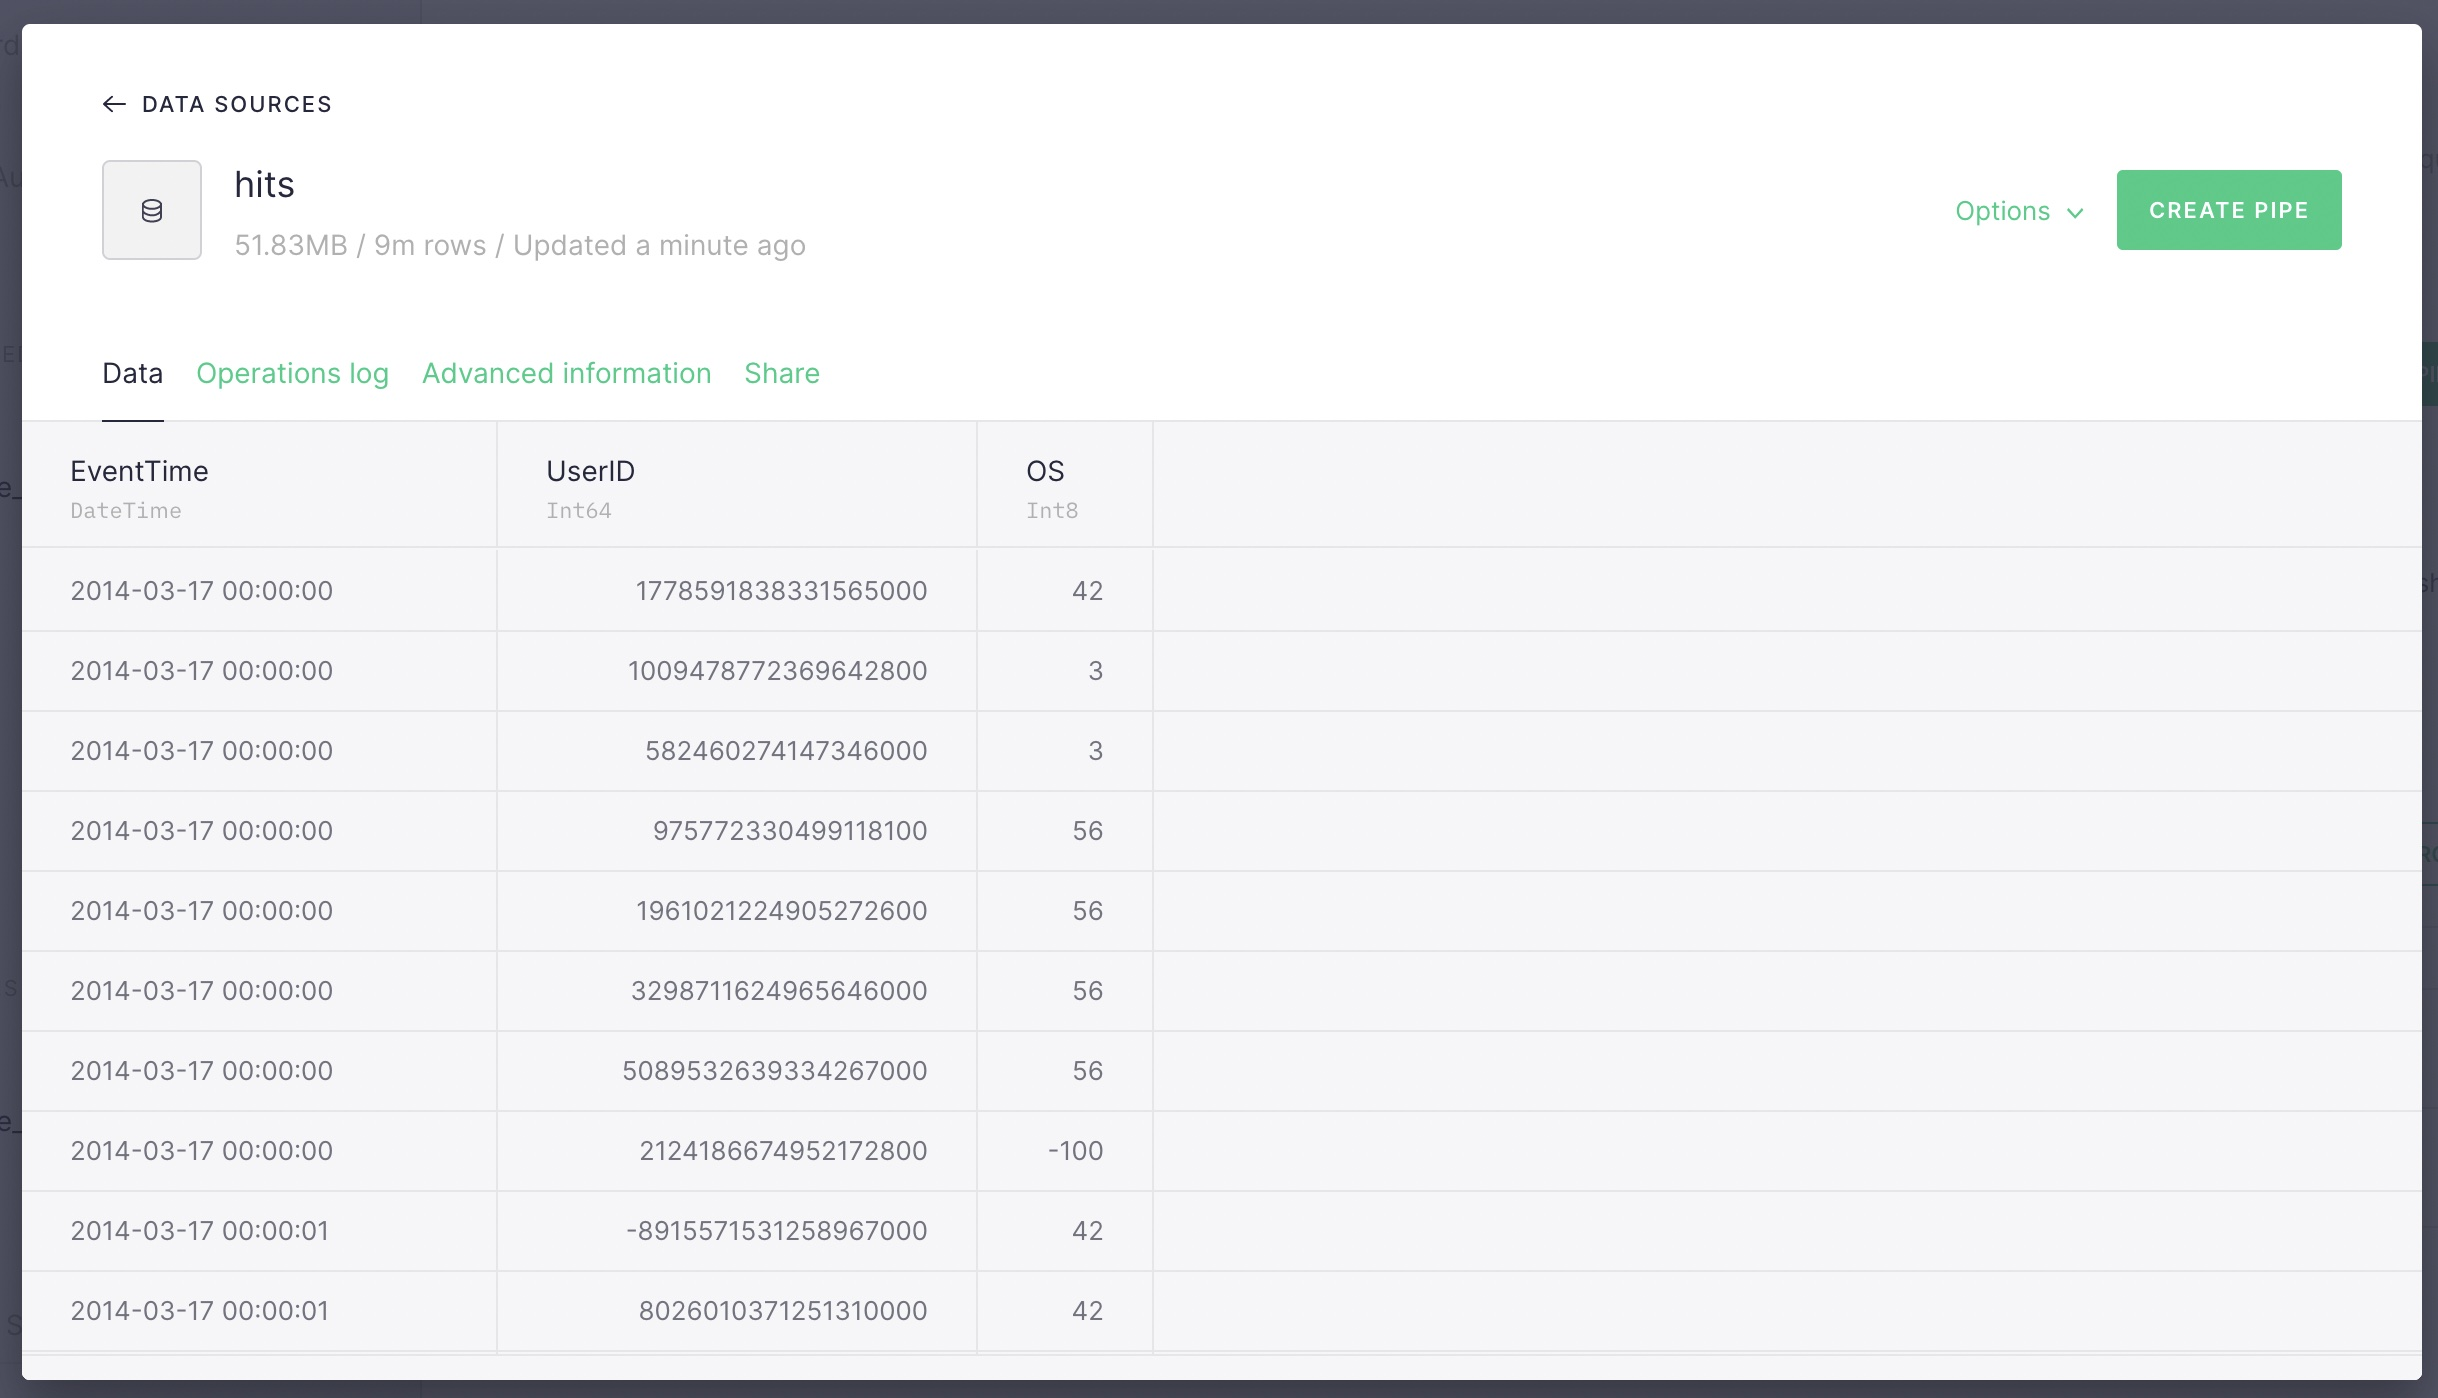